# **Metody generowania zmiennych losowych**
Raport 1
<br>
**Kinga Curkowicz, 268774**
<br>
**Agata Kudlińska, 268739**
<br>
Symulacje komputerowe, grupa T00-22c

W naszym raporcie pokażemy i zaimplementujemy algorytmy dotyczące generowania zmiennych losowych, metody zostały zaimplementowane w Python'ie. Poniższe algorytmy pochodzą z wykładu oraz zajęć labolatoryjnych. Jeśli pochodzą z innych źródeł to są odpowiednio oznaczone.

***

#### Spis treści
1. **Metoda odwracania dystrybuanty**
   <br>
   1.1 Rozkład dyskretny <br>
   1.2 Rozkład ciągły
2. **Metoda akceptacji-odrzucenia**<br>
    2.1 Rozkład dyskretny <br>
    2.2 Rozkład ciągły
3. **Metody generowania rozkładu normalnego** <br>
   3.1 Metoda Boxa-Mullera <br>
   3.2 Metoda biegunowa <br>
   3.3 Metoda akceptacji-odrzucenia <br>
4. **Algorytm Ziggurat** <br>
   4.1 Rozkład normalny<br>
   4.2 Rozkład Pareto
5. Podsumowanie


***

### **1. Metoda odwracania dystrybuanty**
Metoda polega na odwróceniu dystrybuanty o danym rozkładzie. W praktyce oznacza to, że biorąc $ X = F^{-1}(U)$, gdzie $ U \sim \mathcal{U}(0,1) $ dostaniemy zmienną losową X o dystrybuancie F. W sytuacji, gdy F nie jest  ściśle odwrtona, wtedy definiujemy tzw. uogólnioną dystrybuantę odwrtoną. Definiuje się ją za pomocą następującego wzoru: $ X = F^{-1}_{x}(y) = inf \{ x\in R: F_{x}(x)\geq y \} $.

#### 1.1 Rozkład dyskretny

##### Algorytm:
1. Generuj $ U \sim \mathcal{U}(0,1)$
2. Wyznacz  $ i \in N $ takie, że:

    $ \sum_{k=1}^{i-1} p_{k} < U \leq \sum_{k=1}^{i} p_{k} $

3. Zwróć $ X = X_{i} $

##### Przykład
Korzystając z powyżej opisanej metody generujemy 1000 realizacji dyskretnej zmiennej losowej X o rozkładzie:

$ P(X=1)= 0.14, P(X=2)= 0.3, P(X=3)= 0.16, P(X=4)= 0.05, P(X=5)= 0,15,P(X=6)= 0.10, P(X=7)= 0.10$


In [126]:
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
import scipy.stats
import math
from math import log, pi, sqrt, cos, sin
import pylab
from scipy.stats import expon, probplot, norm, beta, pareto, cauchy
from statsmodels.distributions.empirical_distribution import ECDF

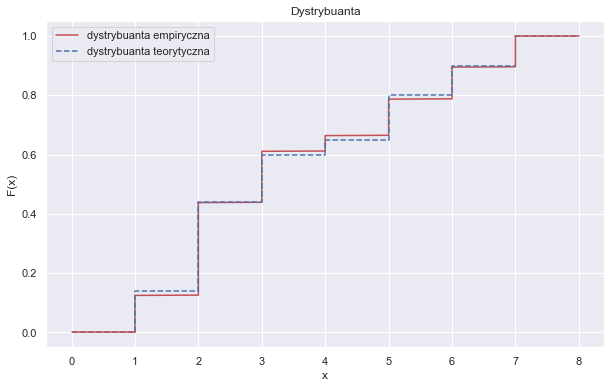

In [127]:
l1 = [1,2,3,4,5,6,7]
l2 = [0.14, 0.3, 0.16, 0.05, 0.15, 0.10,0.10]
c_sum_l2 = [0, 0.14, 0.44, 0.6, 0.65, 0.8,0.9]

def inv_discrete_dist(list_dist):
    u = np.random.uniform(0,1)
    if u < list_dist[0]:
        return 1
    else:
        for j in range(1, len(list_dist)+1):
            if sum(list_dist[0:j]) < u < sum(list_dist[0:j+1]):
                return j+1

def n_realizations(list_dist,n):
    x = []
    for i in range(n):
        x.append(inv_discrete_dist(list_dist))
    return x

result = n_realizations(l2,1000)

def empirical_distribution(data):
    sorted_data = np.sort(data)
    n = len(data)
    y = np.arange(1, n+1)/ float(n)
    return sorted_data, y

data, ecdf = empirical_distribution(result)
plt.figure(figsize=(10,6))
plt.plot(data, ecdf, label = 'dystrybuanta empiryczna', color = 'r')
plt.step(l1,c_sum_l2, label = 'dystrybuanta teorytyczna',color = 'b',linestyle = 'dashed')
plt.plot([0,1], [0,0], color = 'b',linestyle = 'dashed')
plt.plot([7,8], [1,1], color = 'b',linestyle = 'dashed')
plt.plot([0,1], [0,0], color = 'r')
plt.plot([7,8], [1,1], color = 'r')
plt.xlabel("x")
plt.ylabel("F(x)")
plt.legend()
plt.title("Dystrybuanta")
plt.show()
sns.set()

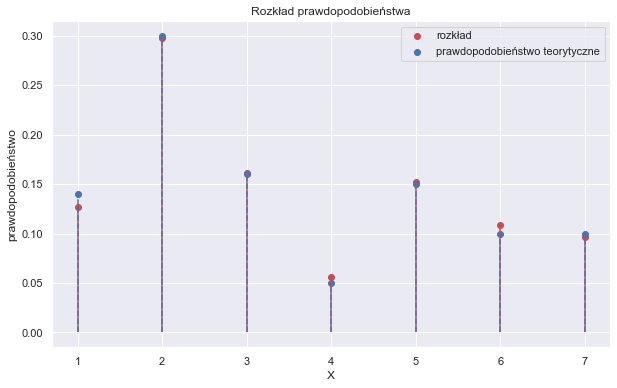

In [128]:
x = n_realizations(l2, 1000)
value, counts = np.unique(x,return_counts = True)
p = counts/1000
plt.figure(figsize=(10,6))
plt.vlines(l1, 0, p, color = 'r')
plt.scatter(l1, p,color = 'r', label = 'rozkład')

plt.scatter(l1,l2, color = 'b', label = 'prawdopodobieństwo teorytyczne')
plt.vlines(l1,0,l2,color = 'b',linestyle = 'dashed')
plt.title('Rozkład prawdopodobieństwa')
plt.xlabel("X")
plt.ylabel("prawdopodobieństwo")
plt.legend()
plt.show()
sns.set()

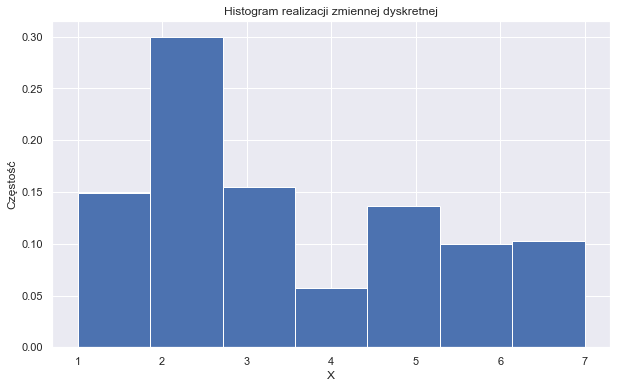

In [129]:
l2 = [0.14, 0.3, 0.16, 0.05, 0.15, 0.10, 0.10]
X = n_realizations(l2, 1000)
plt.figure(figsize=(10,6))
plt.hist(X, bins=7, weights=np.ones(1000) / 1000)
plt.xlabel('X')
plt.ylabel('Częstość')
plt.title("Histogram realizacji zmiennej dyskretnej")
sns.set()

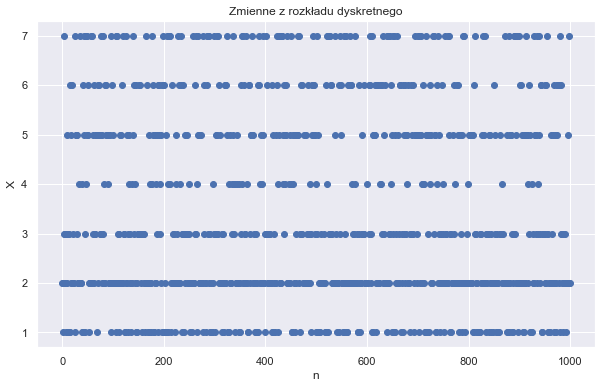

In [130]:
plt.figure(figsize=(10,6))
plt.scatter(np.arange(0, 1000, 1), X)
plt.title("Zmienne z rozkładu dyskretnego")
plt.xlabel("n")
plt.ylabel('X')
sns.set()

##### Średnia i wariancja

In [134]:
results= n_realizations(l2, 1000)

mean1 = np.mean(results)
print('Średnia empiryczna:',mean1)

p = [0.14, 0.3, 0.16, 0.05, 0.15, 0.10, 0.10]
vals = [1,2,3,4,5,6,7]


def mean_variance_discrete(p, vals):
    mean = sum([p[i] * vals[i] for i in range(len(p))])
    variance = sum([p[i] * (vals[i] - mean)**2 for i in range(len(p))])
    return mean, variance

mean_t, var_t = mean_variance_discrete(p, vals)
print('Średnia teorytyczna: ', mean_t)

Średnia empiryczna: 3.512
Średnia teorytyczna:  3.47


In [137]:
var1 = np.var(results)
print('Wariancja empiryczna:', var1)
print('Wariancja teorytyczna:', var_t)

Wariancja empiryczna: 3.7878559999999997
Wariancja teorytyczna: 3.7891000000000004


Udało nam się znaleźć rozkład prawdopodbieństwa generowanej zmiennej loswoej dyskretnej przy pomocy metody odwracania dystrybuanty. Wykresy dystrybunaty teoretycznej i empirycznej pokrywają się oraz prawdopodobieństwo teoretyczne pokrywa się ze znalezionym rozkładem. Średnia i wariancja są zbliżone do wartości teorytycznej.

#### 1.2 Rozkład ciągły

##### Algorytm:
1. Wyznacz $F^{-1}_{x}(y)$
2. Generuj $ U \sim \mathcal{U}(0,1)$
3. Wstaw $ X = F^{-1}_{x}(U) $

##### Przykład
Generujemy tysiąc realizacji zmiennej losowej X z rozkładu Cauchy'ego, $ X \sim \mathcal{C}(0,1)$

In [143]:
def cauchy_odwr_dystr(x):
  return math.tan(math.pi*(x - 0.5)) 

cauchy_sample = [cauchy_odwr_dystr(np.random.rand()) for i in range(1,1001)]

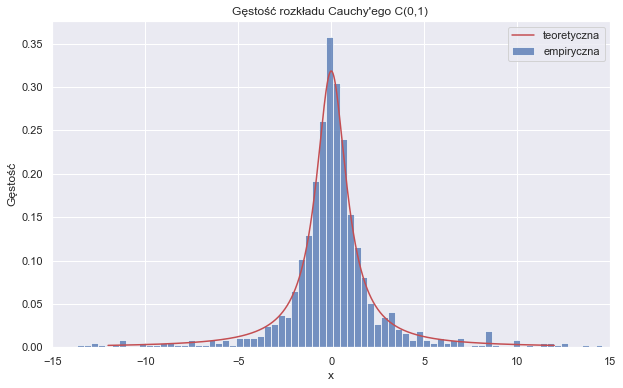

In [144]:
x = np.arange(-12,12,0.01)

plt.figure(figsize=(10,6))
plt.plot(x, cauchy.pdf(x, 0 ,1),color ='r', label="teoretyczna")
plt.title("Gęstość rozkładu Cauchy'ego C(0,1) ")
plt.xlim(-15,15)
sns.histplot(cauchy_sample, stat='density', label="empiryczna")
plt.xlabel("x")
plt.ylabel('Gęstość')
plt.legend()

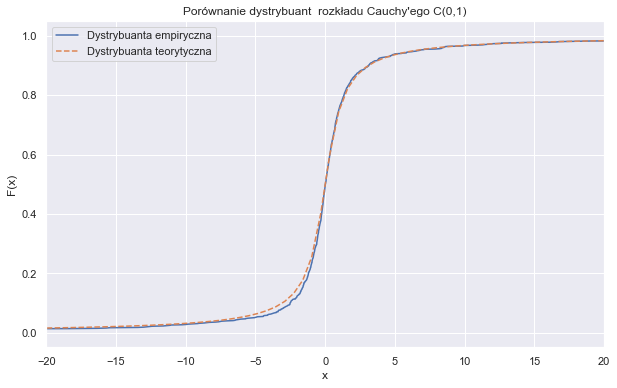

In [145]:
ecdf = ECDF(cauchy_sample)
plt.figure(figsize=(10,6))
plt.plot(ecdf.x, ecdf.y, label = 'Dystrybuanta empiryczna')
plt.xlim(-20,20)
x = np.linspace(cauchy.ppf(0.01),
                cauchy.ppf(0.99), 100)

plt.plot(x, cauchy.cdf(x), label = 'Dystrybuanta teorytyczna', linestyle = 'dashed')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.title("Porównanie dystrybuant  rozkładu Cauchy'ego C(0,1)")
plt.legend()

Text(0.5, 1.0, "Zmienne z rozkładu Cauchy'ego")

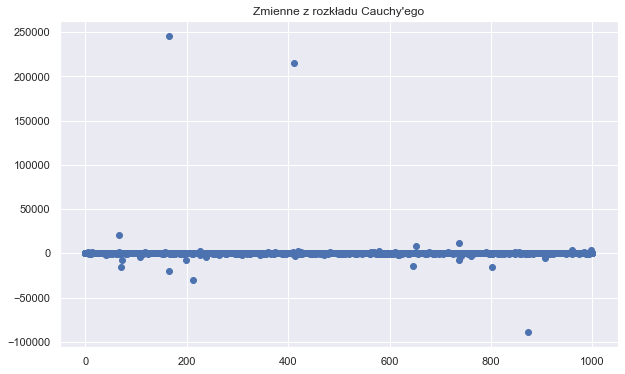

In [146]:
x = np.arange(0,1000, 0.01)
y = [cauchy_odwr_dystr(np.random.rand()) for i in range(1,100001)]
plt.figure(figsize=(10,6))
plt.scatter(x,y)
plt.title("Zmienne z rozkładu Cauchy'ego")

##### QQ - plot

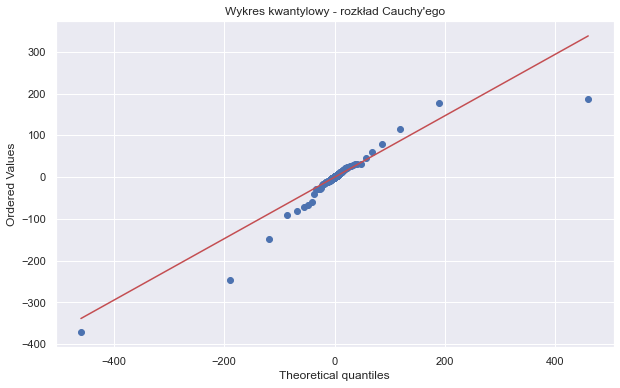

In [147]:
result = cauchy_sample
plt.figure(figsize=(10,6))
probplot(result, dist='cauchy', plot = pylab)
plt.title("Wykres kwantylowy - rozkład Cauchy'ego")
pylab.show()

##### Mediana

In [148]:
result = cauchy_sample
median = np.median(result)
print('Mediana empiryczna:',median)
mediant = cauchy.median()
print('Median teorytyczna',mediant)

Mediana empiryczna: 0.0137861619807148
Median teorytyczna 0.0


##### Rozstęp międzykwartylowy

In [149]:
def my_quartiles(sample):

    sample = sorted(sample)
    n = len(sample)
    q1_index = (n - 1) // 4
    q2_index = (n - 1) // 2
    q3_index = 3 * (n - 1) // 4
    q1 = sample[q1_index]
    q2 = sample[q2_index]
    q3 = sample[q3_index]
    return q1, q2, q3

In [150]:
kwartyle = my_quartiles(cauchy_sample)
print(my_quartiles(cauchy_sample))

(-0.8991319614233105, 0.010447561913127443, 0.9673288092806025)


In [151]:
def rozstep_miedzykwartylowy(sample):

    q1, q2, q3 = my_quartiles(sample)
    return q3 - q1

In [152]:
iqr1 = rozstep_miedzykwartylowy(cauchy_sample)
print('Rozstęp międzykwartylowy empiryczny:', iqr1)

Rozstęp międzykwartylowy empiryczny: 1.8664607707039131


In [153]:
cauchy_t = cauchy.rvs(size = 100000)
iqrt = rozstep_miedzykwartylowy(cauchy_t)
print('Rozstęp międzykwartylowy dla genratora z scipy.stats:', iqrt)

Rozstęp międzykwartylowy dla genratora z scipy.stats: 1.9969131301042964


##### Średnia i wariancja

Rozkład Cauchy'ego C(0,1) nie ma skończonej wartości oczekiwanej ani skończonej wariancji, ponieważ gęstość prawdopodobieństwa rozkładu Cauchy'ego nie jest całkowalna. 

Udało nam się poprawnie wygenerować próbkę z rozkładu Cauchy'ego $ X \sim \mathcal{C}(0,1)$ korzystając z  algorytmu metody odwracania dystrybuanty dla rozkładu ciągłego. Wykresy gęstości i dystrybunaty pokrywają się z teorytyczną gęstością i dystrybuantą, a wartość oczekiwana i wariancja w tym przypadku nie istnieją, więc obliczyłyśmy medianę i rozstęp międzykwartylowy, które zgadzają się z charakterystyką danego rozkładu. Rozstęp międzykwartylowy dla próbki z rozkładu Cauchy'ego C(0,1) wynoszący około 2 oznacza, że wartości skupione są wokół mediany, ale jednocześnie występują duże wartości odstające (tzw. outliery) na obu końcach rozkładu.

***

### **2. Metoda akceptacji-odrzucenia**
Metodę stosuje się do wygenerowania próbek z rozkładu, w którym ciężko jest wyznaczyć dystrybuantę odwrotną lub jest to niemożliwe. Polega na generowaniu rozkładu pomocniczego i odrzucaniu tych próbek, które nie spełniają odpowiednich warunków.

#### 2.1 Rozkład dyskretny <br>
Założenia:
1. potrafimy generować realizację innej zmiennej losowej Y o rozkładzie $ q_i  = P(Y=i) $, gdzie $ i = 1, 2, ... $, $ \sum_i q_i = 1$, oraz zbiory wartośći Y i zmiennej, którą chcemy wygerenrować muszą być takie same
2. istnieje stała $ 0 < c < \infty $ taka, że $ max_i\ \frac{p_i}{q_i}\ \leq 1 $

##### Algorytm:
1. Generuj  $Y$
2. Generuj $ U \sim \mathcal{U}(0,1) $, $  U \perp Y $
3. Jeśli $ U \leq \frac{p_Y}{cq_Y} $ zwróć $ X =Y $. Jeśli nie - wróc do 1.


##### Przykład

$ P(X=1)= 0.25, P(X=2)= 0.02, P(X=3)= 0.27, P(X=4)= 0.19, P(X=5)= 0.25,P(X=6)= 0.02$

0.2545
0.0205
0.2706
0.1945
0.2398
0.0201


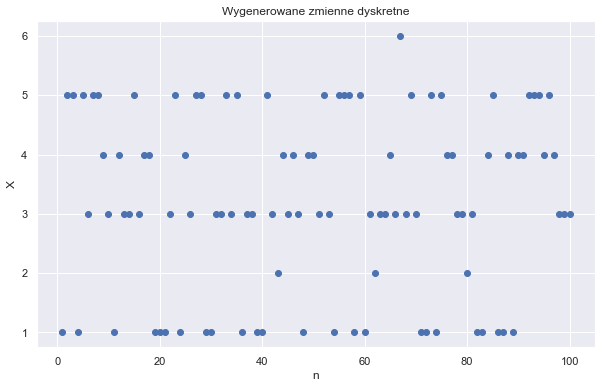

In [154]:
def akc_odrz(values, p, n_sample=1):
    values = [i+1 for i in range(values)]
    C = max(p) / (1/len(values))
    samples = []
    while len(samples) < n_sample:
        x1 = np.random.uniform(0,1)

        y = math.ceil(len(values)*x1)
        x = np.random.uniform(0,1)

        if x <= p[y-1]/(C*1/len(values)):
            samples.append(y)

    return np.array(samples)

val = 6
p = [0.25,0.02,0.27,0.19,0.25,0.02]
n = 100
result = akc_odrz(val, p, n)

plt.figure(figsize=(10,6))
plt.title('Wygenerowane zmienne dyskretne')
plt.xlabel('n')
plt.ylabel('X')
plt.scatter(range(1,len(result)+1), result)

n = 10000
x = akc_odrz(val, p, n)
for i in range(1, val+1):
    print((x==i).sum()/n)

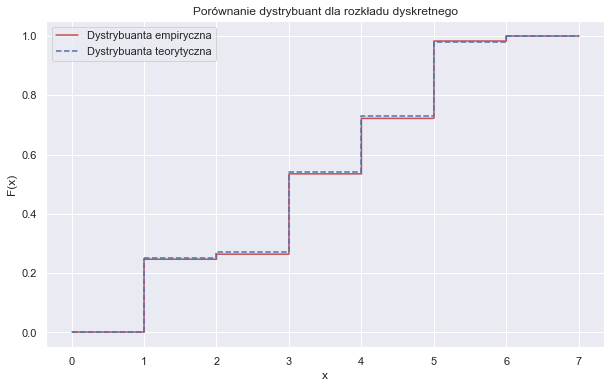

In [155]:
results = akc_odrz(val,p,1000)
ecdf = ECDF(results)

plt.figure(figsize=(10,6))
plt.step(ecdf.x, ecdf.y, color = 'r' ,label = 'Dystrybuanta empiryczna')
plt.title('Porównanie dystrybuant dla rozkładu dyskretnego')
plt.plot([0,1], [0,0], color = 'r')
plt.plot([6,7], [1,1], color = 'r')

plt.step(range(1,7), np.cumsum(p),color = 'b', label = 'Dystrybuanta teorytyczna', where = 'post', linestyle = 'dashed')
plt.plot([0,1], [0,0], color = 'b', linestyle = 'dashed')
plt.plot([1,1], [0,0.25], color = 'b', linestyle = 'dashed')
plt.plot([6,7], [1,1], color = 'b', linestyle = 'dashed')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.legend()

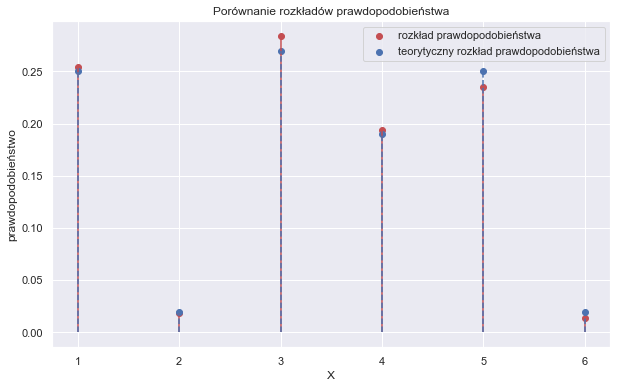

In [156]:
results = akc_odrz(val,p,1000)
ran = [i for i in range(1,7)]
value, counts = np.unique(results, return_counts = True)
p_emp = counts/1000

plt.figure(figsize=(10,6))
plt.vlines(ran, 0, p_emp, color = 'r')
plt.scatter(ran, p_emp,color = 'r', label = 'rozkład prawdopodobieństwa')

plt.scatter(ran, p, color = 'b', label = 'teorytyczny rozkład prawdopodobieństwa')
plt.vlines(ran,0,p,color = 'b',linestyle = 'dashed')
plt.title('Porównanie rozkładów prawdopodobieństwa')
plt.xlabel('X')
plt.ylabel('prawdopodobieństwo')
plt.legend()
sns.set()

##### Średnia i wariancja

In [157]:
results = akc_odrz(val,p,1000)

mean1 = np.mean(results)
print('Średnia empiryczna:',mean1)

p = [0.25,0.02,0.27,0.19,0.25,0.02]
vals = [1,2,3,4,5,6]

def mean_variance_discrete(p, vals):
    mean = sum([p[i] * vals[i] for i in range(len(p))])
    variance = sum([p[i] * (vals[i] - mean)**2 for i in range(len(p))])
    return mean, variance

mean_t, var_t = mean_variance_discrete(p, vals)
print('Średnia teorytyczna: ', mean_t)

Średnia empiryczna: 3.174
Średnia teorytyczna:  3.2300000000000004


In [158]:
var1 = np.var(results)
print('Wariancja empiryczna:', var1)
print('Wariancja teorytyczna:', var_t)

Wariancja empiryczna: 2.383724
Wariancja teorytyczna: 2.3371


Udało nam się znaleźć rozkład prawdopodbieństwa generowanej zmiennej loswoej dyskretnej przy pomocy metody akceptacji-odrzucenia. Wykresy dystrybunaty teoretycznej i empirycznej pokrywają się oraz prawdopodobieństwo teoretyczne pokrywa się ze znalezionym rozkładem. Średnia i wariancja są zbliżone do wartości teorytycznej.

#### 2.1 Rozkład ciągły <br>
Chcemy wygenerować zmienną losową ciągłą $X$ o gęstości $f(x)$
<br>
Założenia:
1. Potrafimy generować inną zmienną losową $ Y $ o gęstości $ g(x) $ oraz Y i zmienna, którą chcemy wygenerować muszą przyjmować wartości z tego samego zbioru
2. Potrafimy wyznaczyć stałą $ c $ taką, że $ sup_{x \in \mathbb{R}} \frac{f(x)}{g(x)} \leq c \leq \infty $


##### Algorytm:
1. Generuj $Y$
2. Generuj $ U \sim \mathcal{U}(0,1) $, $  U \perp Y $
3. Jeśli $ U \leq \frac{f(Y)}{cg(Y)} $ zwróć $ X =Y $. Jeśli nie - wróc do 1.


##### Przykład

Wygenerujemy próbkę z rozkładu **beta** [[1](#bibliografia)]
<br>
Rozkład beta ma dystrybuantę postaci $ f(x) = bx^\alpha(1-x)^\beta $, gdzie $ \alpha $ i $ \beta $ są nieujemne a b to stała normująca rozkład do 1, 
<br>
$ b = \frac{1}{B(\alpha, \beta)} = (\int_0^1 x^{\alpha-1}(1-x)^{\beta-1}dx)^{-1} $
<br>

My wygenerujemy szczególny przypadek rozkładu beta, kiedy $ \alpha $ i $\beta$ są równe. Jako rozkładu pomocniczego użyjemy rozkładu jednostajnego na przedziale (0,1).

Jeśli $ g(x) = 1 $ dla $ x \in (0,1) $, a $ f(x) = bx^\alpha(1-x)^\alpha $ to
$ c = max\ f(x) $
<br>
$c = max\ f(x)$ = $ b(\frac{1}{4}) ^\alpha$, bo $ f(x) $ osiąga maksimum dla $ x = \frac{1}{2} $.
<br>
($f'(x) = b\alpha(x(1-x))(1-2x) = 0$ dla $ x = 0, x = \frac{1}{2} $ i $ x = 1$, a dla $x = \frac{1}{2}$ wartość $f(x)$ jest największa)

$ \frac{f(x)}{cg(x)} = \frac{bx^\alpha(1-x)^\alpha}{b(\frac{1}{4}) ^\alpha} = 4^\alpha (x(1-x))^\alpha $

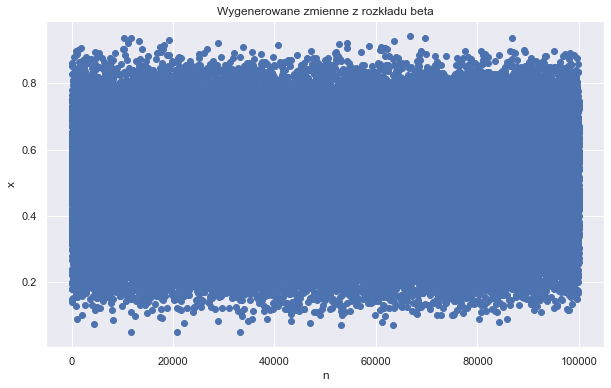

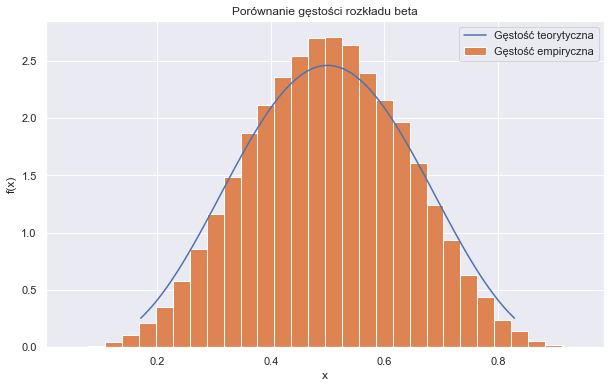

In [160]:
alfa1 = 5

def akc_odrz_beta(alfa,num):
    samples = []
    if alfa == 1: # wtedy rozkład jednostajny
        return np.random.random(num)
    while len(samples) < num:
        y = np.random.uniform()
        u = np.random.uniform()
        if u <= (4**alfa)*(y**alfa)*(1-y)**alfa:
            samples.append(y)
    return samples

result = akc_odrz_beta(alfa1, 100000)
plt.figure(figsize=(10,6))
plt.scatter(range(len(result)), result)
plt.xlabel('n')
plt.ylabel('x')
plt.title('Wygenerowane zmienne z rozkładu beta')
plt.show()

x = np.linspace(beta.ppf(0.01, alfa1,alfa1),
                beta.ppf(0.99, alfa1,alfa1), 100)
plt.figure(figsize=(10,6))
plt.plot(x, beta.pdf(x, alfa1, alfa1), label = 'Gęstość teorytyczna')
plt.hist(result, bins = 30, density = True, label = 'Gęstość empiryczna')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Porównanie gęstości rozkładu beta')
plt.legend()

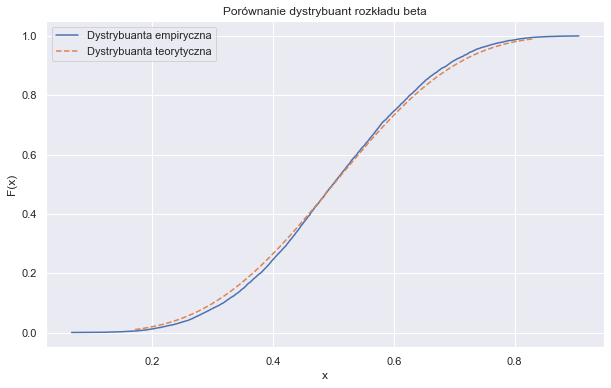

In [161]:
result = akc_odrz_beta(alfa1,10000)

ecdf = ECDF(result)
plt.figure(figsize=(10,6))
plt.plot(ecdf.x, ecdf.y, label = 'Dystrybuanta empiryczna')

plt.plot(x, beta.cdf(x, alfa1,alfa1), label = 'Dystrybuanta teorytyczna', linestyle = 'dashed')

plt.xlabel('x')
plt.ylabel('F(x)')
plt.title('Porównanie dystrybuant rozkładu beta')
plt.legend()

##### Średnia i wariancja

In [162]:
result = akc_odrz_beta(alfa1, 10000)
mean1 = sum(result)/10000
print('Średnia empiryczna:',mean1)
mean_t = beta.mean(alfa1,alfa1)
print('Średnia teorytyczna',mean_t)

Średnia empiryczna: 0.4997619766303065
Średnia teorytyczna 0.5


In [163]:
var1 = np.var(result)
print('Wariancja empiryczna:', var1)
var_t = beta.var(alfa1,alfa1)
print('Wariancja teorytyczna:', var_t)

Wariancja empiryczna: 0.01916286049391254
Wariancja teorytyczna: 0.022727272727272728


##### QQ-plot

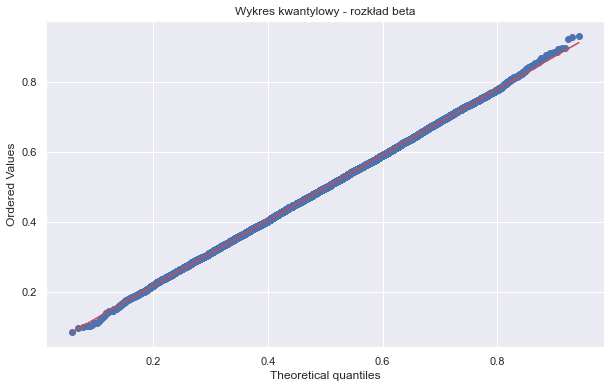

In [164]:
result = akc_odrz_beta(alfa1, 10000)
plt.figure(figsize=(10,6))
probplot(result, dist = beta(alfa1,alfa1), plot = pylab)
plt.title("Wykres kwantylowy - rozkład beta")
pylab.show()


Wykres kwantylowy wygenerowanej próbki z rozkładu beta pokrywa się z teorytycznym wykresem kwantylowym rozkładu beta - algorytm został poprawnie zaimplementowany. Wykresy gęstości empirycznej i dystrybuanty empirycznej są zbliżone do ich teorytycznych odpowiedników, tak samo w przypadku średniej i wariancji.

***

### 3. Metody generowania rozkładu normalnego
Będziemy generować zmienne z rozkładu normalnego standarowego $ X_{0} \sim \mathcal{N}(0,1)$, gdzie $\mu$ to średnia, a $\sigma$ to wariancja. 

In [165]:
mi = 0
sigma = 1
n = 10000

#### 3.1 Metoda Boxa - Mullera
Algorytm:
1. Generuj niezależne $U_{1}, U_{2}$, gdzie $U_{i} \sim \mathcal{U}(0,1)$
2. Wstaw $X=\sqrt{-2{\ln{U_1}}} \cos(2\pi U_2)$ oraz $Y=\sqrt{-2{\ln{U_1}}} \sin(2\pi U_2)$.

Wtedy $X$ i $Y$ są niezależne oraz $X,Y \sim N(0,1)$.

Wygenerujemy rozkład normalny o średniej  $\mu = 0$ i wariancji $\sigma = 1$, $X \sim \mathcal{N}(0,1)$ 


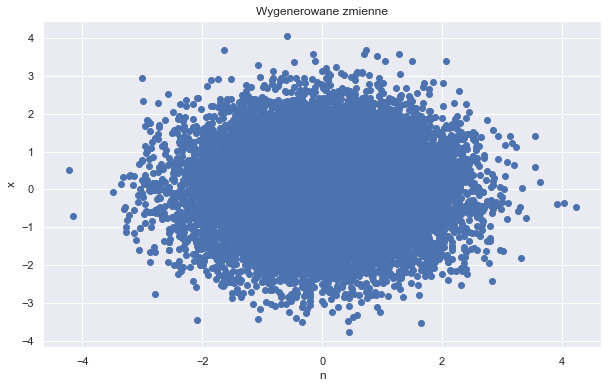

In [166]:
def box_muller(n):
    U_1 = np.random.uniform(0,1,n)
    U_2 = np.random.uniform(0,1,n)
    X = np.sqrt(-2*np.log(U_1)) * np.cos(2*np.pi*U_2)
    Y = np.sqrt(-2*np.log(U_1)) * np.sin(2*np.pi*U_2)
    values = np.concatenate((X, Y))
      
    return values

values = box_muller(10000)
values1 = box_muller(10000)

plt.figure(figsize=(10,6))
plt.scatter(values, values1)
plt.xlabel('n')
plt.ylabel('x')
plt.title('Wygenerowane zmienne')
plt.show()


In [167]:
def gestosc_norm(x, mi, sigma):
  return (1/(np.sqrt(2*np.pi*sigma**2)))*np.exp(-((x-mi)**2)/(2*sigma**2))

In [168]:
def dystr_norm(x, mi, sigma):
  return 1/2*(1+scipy.special.erf((x-mi)/(sigma*np.sqrt(2))))

In [169]:
rand_norm_tab = np.random.rand(n)

def normal_generator(u_rand, mu, sigma):
    a = scipy.special.erfinv(2 * u_rand - 1) * np.sqrt(2) * sigma + mu
    return a


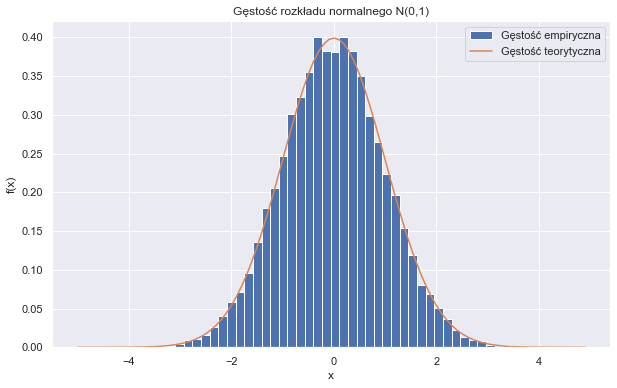

In [170]:
x = np.arange(-5,5,0.1)
box_muller_values =  box_muller(n)
ecdf = ECDF(box_muller_values)
plt.figure(figsize=(10,6))
plt.hist(box_muller_values, bins = 50, density = True, label = 'Gęstość empiryczna')
plt.plot(x,norm.pdf(x), label = 'Gęstość teorytyczna')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title("Gęstość rozkładu normalnego N(0,1)")
plt.legend()

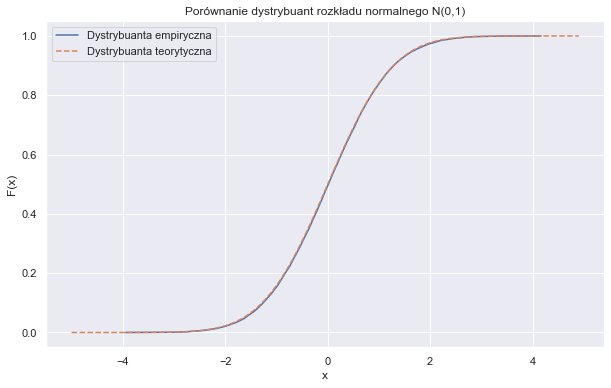

In [171]:
x = np.arange(-5,5,0.1)
box_muller_values =  box_muller(n)
ecdf = ECDF(box_muller_values)
plt.figure(figsize=(10,6))
plt.plot(ecdf.x, ecdf.y, label = 'Dystrybuanta empiryczna')
plt.plot(x, norm.cdf(x), label = 'Dystrybuanta teorytyczna', linestyle = 'dashed')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.title('Porównanie dystrybuant rozkładu normalnego N(0,1)')
plt.legend()

##### QQ plot

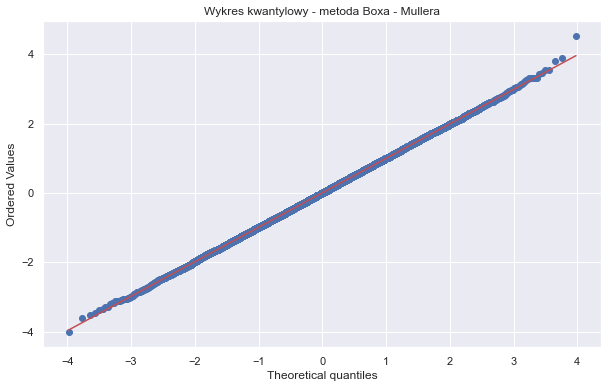

In [172]:
box_muller_values = box_muller(n)
plt.figure(figsize=(10,6))
probplot(box_muller_values, dist = 'norm', plot = pylab)
plt.title("Wykres kwantylowy - metoda Boxa - Mullera")
pylab.show()

In [173]:
box_muller_values = box_muller(n)

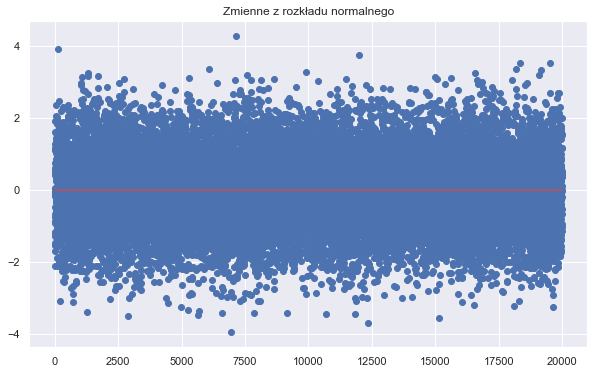

In [174]:
x = np.arange(0, 20000)
y = box_muller_values
plt.figure(figsize=(10,6))
plt.scatter(x, y)
plt.title("Zmienne z rozkładu normalnego")
m = norm.mean()
plt.plot(x , [m for i in x], color = 'r')

##### Porównanie średnich i wariancji

In [180]:
result = box_muller_values
mean1 = sum(result)/len(result)
print('Średnia empiryczna:', mean1)

mean_t = norm.mean()
print('Średnia teorytyczna:', mean_t)

Średnia empiryczna: 0.01587350303203405
Średnia teorytyczna: 0.0


In [181]:
result2 = [i**2 for i in result]
var1 = sum(result2)/len(result2) - mean1**2
print('Wariancja empiryczna:', var1)

var_t = norm.var()
print('Wariancja teorytyczna:', var_t)


Wariancja empiryczna: 1.0048433385085613
Wariancja teorytyczna: 1.0


##### Skośność i kurtoza

In [182]:
def var_estimator(data):
    n = len(data)
    mean = sum(data) / n
    variance = sum((x - mean) ** 2 for x in data) / (n - 1)
    return variance

def skew_kurt_estimator(x):
    n = len(x)
    mean = sum(x) / n
    var = var_estimator(x)
    skewness = (1/n) * np.sum((x - mean)**3)/ var**(3/2)
    kurtosis = (1/n * np.sum((x - mean)**4))/var**2 - 3
    return skewness, kurtosis

In [183]:
skew1, kurtosis1 = skew_kurt_estimator(box_muller_values)

skewness_t = norm.stats(loc=0, scale=1, moments='s')
print('Skośność empiryczna:', skew1)
print('Skośność teorytyczna:', skewness_t)

kurtosis_t = norm.stats(loc=0, scale=1, moments='k')

print('Kurtoza empiryczna:',kurtosis1)
print('Kurtoza teorytyczna:',kurtosis_t)


Skośność empiryczna: -0.019566686972304383
Skośność teorytyczna: 0.0
Kurtoza empiryczna: 0.009281944148971988
Kurtoza teorytyczna: 0.0


#### Wnioski
Wykres kwantylowy wygenerowanej próbki z rozkładu normalnego metodą Box - Mullera pokrywa się z teorytycznym wykresem kwantylowym rozkładu normalnego - algorytm został poprawnie zaimplementowany. Wykresy gęstości empirycznej i dystrybuanty empirycznej są zbliżone do ich teorytycznych odpowiedników, tak samo w przypadku średniej i wariancji. Skośność i kurtoza empiryczna również zgadzają się z wartościami teoretycznymi.

#### 3.2 Metoda biegunowa
Chcemy pozbyć się $\sin$ i $\cos$ z powyższej metody Boxa - Mullera. Zatem generujemy wektor $\left(V_{1}, V_{2}\right)$ o rozkładzie jednostajnym w kole jednostkowym, gdzie $V_{1} = Rcos\alpha, V_{2} = Rcos\alpha$

Algorytm:
1. Generuj niezależne $V_{1}, V_{2} \sim \mathcal{U}(-1,1)$
2. Wyznacz $R^{2} = V^{2}_{1} + V^{2}_{2} $
3. Jeśli $R^{2} > 1$ wróć do punktu pierwszego, w przeciwnym wypadku wstaw
    $X =\sqrt{\frac{-2\ln{R^2}}{R^2}}V_{1}$ oraz $Y=\sqrt{\frac{-2\ln{R^2}}{R^2}}V_{2}$.

Wtedy $X$ i $Y$ są niezależne oraz $X,Y \sim N(0,1)$.

Wygenerujemy ponownie rozkład normalny o średniej  $\mu = 0$ i wariancji $\sigma = 1$, $X \sim \mathcal{N}(0,1)$ 


In [184]:
mi = 0
sigma = 1
n = 10000

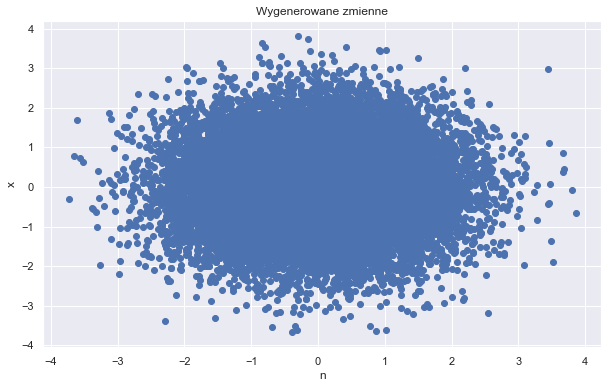

In [185]:
def biegunowa(n):
    X = []
    Y = []
    i = 0
    while i < n:
        U1 = random.uniform(-1,1)
        U2 = random.uniform(-1,1)
        r = U1**2 + U2**2
        if r <= 1:
            X.append(U1*np.sqrt(-2*np.log(r)/r))
            Y.append(U2*np.sqrt(-2*np.log(r)/r))
            i += 1
    values = np.concatenate((X, Y))
    return values

values = biegunowa(n)
values1 = biegunowa(n)

plt.figure(figsize=(10,6))
plt.scatter(values, values1)
plt.xlabel('n')
plt.ylabel('x')
plt.title('Wygenerowane zmienne')
plt.show()


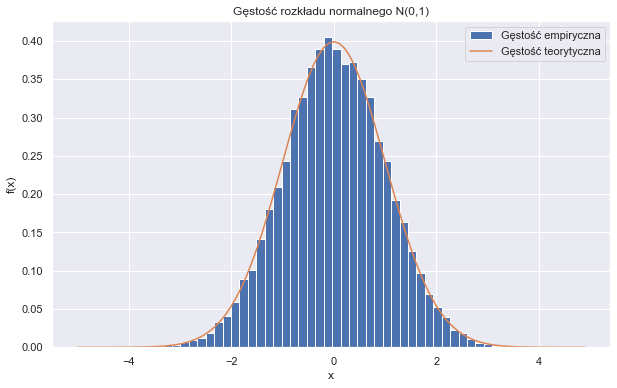

In [186]:
x = np.arange(-5,5,0.1)
biegunowa_values =  biegunowa(n)
ecdf = ECDF(biegunowa_values)
plt.figure(figsize=(10,6))
plt.hist(biegunowa_values, bins = 50, density = True, label = 'Gęstość empiryczna')
plt.plot(x,norm.pdf(x), label = 'Gęstość teorytyczna')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title("Gęstość rozkładu normalnego N(0,1)")
plt.legend()

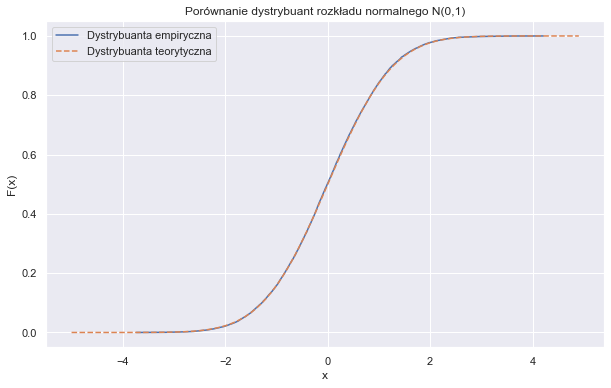

In [187]:
x = np.arange(-5,5,0.1)
biegunowa_values = biegunowa(n)
ecdf = ECDF(biegunowa_values)
plt.figure(figsize=(10,6))
plt.plot(ecdf.x, ecdf.y, label = 'Dystrybuanta empiryczna')
plt.plot(x, norm.cdf(x), label = 'Dystrybuanta teorytyczna', linestyle = 'dashed')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.title('Porównanie dystrybuant rozkładu normalnego N(0,1)')
plt.legend()

##### QQ plot

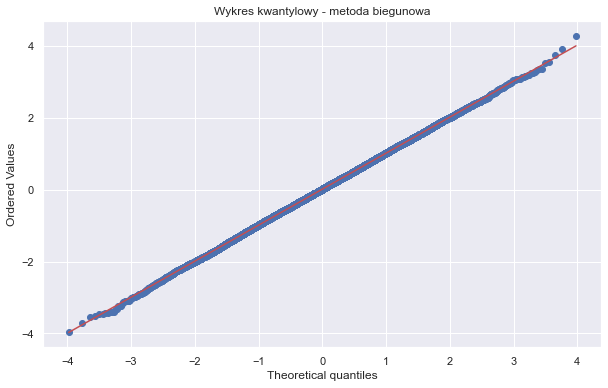

In [188]:
biegunowa_values = biegunowa(n)
plt.figure(figsize=(10,6))
probplot(box_muller_values, dist = 'norm', plot = pylab)
plt.title("Wykres kwantylowy - metoda biegunowa")
pylab.show()

##### Porównanie średnich i wariancji

In [189]:
n = 10000
biegunowa_values = biegunowa(n)

In [190]:
result = biegunowa_values
mean1 = sum(result)/n
print('Średnia empiryczna:', mean1)

mean_t = norm.mean()
print('Średnia teorytyczna:', mean_t)

Średnia empiryczna: -0.036818072720400497
Średnia teorytyczna: 0.0


In [191]:
result2 = [i**2 for i in result]
var1 = sum(result2)/len(result2) - mean1**2
print('Wariancja empiryczna:', var1)

var_t = norm.var()
print('Wariancja teorytyczna:', var_t)

Wariancja empiryczna: 1.0090736889023706
Wariancja teorytyczna: 1.0


##### Skośność i kurtoza

In [192]:
skew1, kurtosis1 = skew_kurt_estimator(biegunowa_values)

skewness_t = norm.stats(loc=0, scale=1, moments='s')
print('Skośność empiryczna:', skew1)
print('Skośność teorytyczna:', skewness_t)

kurtosis_t = norm.stats(loc=0, scale=1, moments='k')

print('Kurtoza empiryczna:',kurtosis1)
print('Kurtoza teorytyczna:',kurtosis_t)

Skośność empiryczna: 0.013845480219800452
Skośność teorytyczna: 0.0
Kurtoza empiryczna: -0.026009424563452566
Kurtoza teorytyczna: 0.0


Wykres kwantylowy wygenerowanej próbki z rozkładu normalnego metodą biegunową pokrywa się z teorytycznym wykresem kwantylowym rozkładu normalnego - algorytm został poprawnie zaimplementowany. Wykresy gęstości empirycznej i dystrybuanty empirycznej są zbliżone do ich teorytycznych odpowiedników, tak samo w przypadku średniej i wariancji. Skośność i kurtoza empiryczna również zgadzają się z wartościami teoretycznymi.

#### 3.3 Metoda akceptacji-odrzucenia

Aby wygenerować próbkę z rozkładu normalnego metodą akceptacji-odrzucenia korzystamy z rozkładu wykładniczego jako rozkład pomocniczy. Generujemy próbkę z rozkładu normalnego o średniej równej 0 i wariancji równej 0.5 i odbijamy ją względem osi OY.

Gęstość rozkładu $ N(0,\frac{1}{2}) $
$$ f(x) = \frac{2}{\sqrt{2\pi}} e^{\frac{-x^2}{2}} $$
Gęstość rozkładu pomocniczego $ Exp(1) $
$$ g(x) = e^{-x} $$
dla $ x \geq 0 $. Rozkład wykładniczy wygenerujemy przy pomocy metody odwrotnej dystrybuanty opisanej wyżej. (można w ktorym punkcie na koniec)

Stała c [[1](#bibliografia)]
$$ c = max \frac{f(x)}{g(x)} $$
$$ \frac{f(x)}{g(x)} = \sqrt{\frac{2}{\pi}} e^{\frac{-x^2}{2}+x} $$
Po obliczeniu pochodnej z ilorazu i przyrównaniu jej do 0 otrzymujemy wartość maksymalną ilorazu, którą osiąga w punkcie $ x = 1 $
$$ c = \sqrt{\frac{2e}{\pi}}$$

Wygenerujemy rozkład normalny o średniej  $\mu = 0$ i wariancji $\sigma = 1$, $X \sim \mathcal{N}(0,1)$ 

In [193]:
# rozkład wykładniczy
def inverse_dist_exp(lambda1):
    U = np.random.random()
    exp = -np.log(U)/lambda1
    return exp

def norm_akc_odrz(num):
    samples = []
    while len(samples) < num:
        e1 = inverse_dist_exp(1)
        u = np.random.random()
        u1 = np.random.random()
        if u <= (np.sqrt(2*np.e/np.pi))*(norm.pdf(e1)/expon.pdf(e1)):
            if u1 < 0.5:
                samples.append(-e1)
            else:
                samples.append(e1)
    return samples

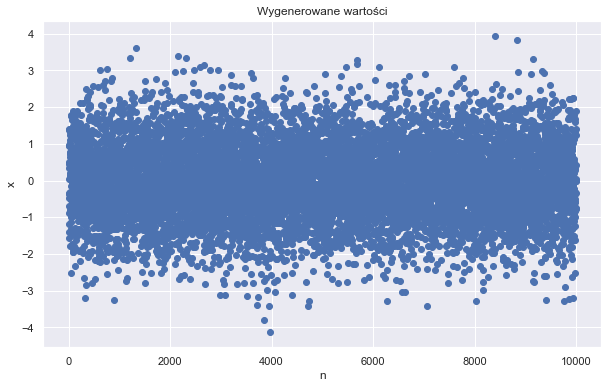

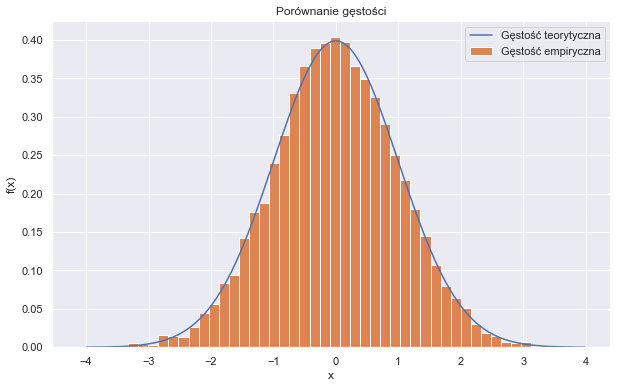

In [195]:
result = norm_akc_odrz(10000)
plt.figure(figsize=(10,6))
plt.scatter(range(len(result)), result)
plt.xlabel('n')
plt.ylabel('x')
plt.title('Wygenerowane wartości')
plt.show()

x = np.arange(-4,4,0.01)
y = norm.pdf(x)
plt.figure(figsize=(10,6))
plt.plot(x, y, label = 'Gęstość teorytyczna')
plt.hist(result, bins = 50, density = True, label = 'Gęstość empiryczna')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Porównanie gęstości')
plt.legend()

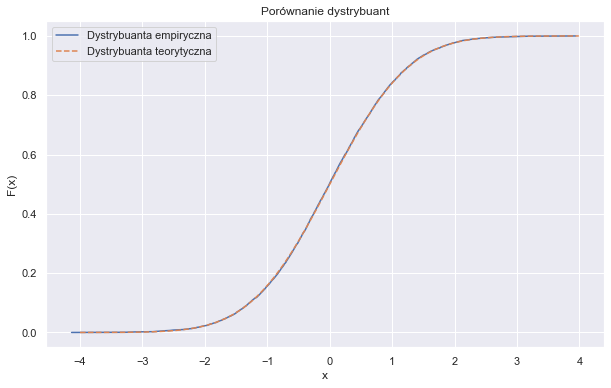

In [196]:
ecdf = ECDF(result)
plt.figure(figsize=(10,6))
plt.plot(ecdf.x, ecdf.y, label = 'Dystrybuanta empiryczna')
x = np.arange(-4,4,0.01)
y = norm.cdf(x)
plt.plot(x, y, label = 'Dystrybuanta teorytyczna', linestyle = 'dashed')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.title('Porównanie dystrybuant')
plt.legend()

##### QQ plot

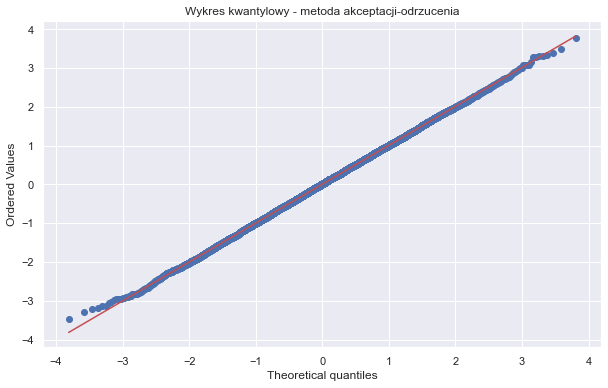

In [197]:
result = norm_akc_odrz(10000)
plt.figure(figsize=(10,6))
probplot(result, dist = 'norm', plot = pylab)
plt.title("Wykres kwantylowy - metoda akceptacji-odrzucenia")
pylab.show()

##### Porównanie średnich i wariancji

In [198]:
result = norm_akc_odrz(10000)
mean1 = sum(result)/10000
print('Średnia empiryczna:', mean1)

mean_t = norm.mean()
print('Średnia teorytyczna:', mean_t)

Średnia empiryczna: -0.012885814440592077
Średnia teorytyczna: 0.0


In [200]:
result2 = [i**2 for i in result]
var1 = sum(result2)/10000 - mean1**2
print('Wariancja empiryczna:', var1)

var_t = norm.var()
print('Wariancja teorytyczna:', var_t)


Wariancja empiryczna: 0.986120059650572
Wariancja teorytyczna: 1.0


##### Skośność i kurtoza

In [201]:
def var_estimator(data):
    n = len(data)
    mean = sum(data) / n
    variance = sum((x - mean) ** 2 for x in data) / (n - 1)
    return variance

def skew_kurt_estimator(x):
    n = len(x)
    mean = sum(x) / n
    var = var_estimator(x)
    skewness = (1/n) * np.sum((x - mean)**3)/ var**(3/2)
    kurtosis = (1/n * np.sum((x - mean)**4))/var**2 - 3
    return skewness, kurtosis


In [202]:
skew1, kurtosis1 = skew_kurt_estimator(result)

skewness_t = norm.stats(loc=0, scale=1, moments='s')
print('Skośność empiryczna:', skew1)
print('Skośność teorytyczna:', skewness_t)

kurtosis_t = norm.stats(loc=0, scale=1, moments='k')

print('Kurtoza empiryczna:',kurtosis1)
print('Kurtoza teorytyczna:',kurtosis_t)


Skośność empiryczna: -0.0027285648673556523
Skośność teorytyczna: 0.0
Kurtoza empiryczna: 0.05449437539863533
Kurtoza teorytyczna: 0.0


Wykres kwantylowy wygenerowanej próbki z rozkładu normalnego metodą akceptacji i odrzucenia z użyciem pomocniczego rozkładu wykładniczego pokrywa się z teorytycznym wykresem kwantylowym rozkładu normalnego - algorytm został poprawnie zaimplementowany. Wykresy gęstości empirycznej i dystrybuanty empirycznej są zbliżone do ich teorytycznych odpowiedników, tak samo w przypadku średniej i wariancji. Skośność i kurtoza empiryczna również zgadzają się z wartościami teoretycznymi.

Po przeanalizowaniu otrzymanych wyników doszłyśmy do wniosku, że wszystkie 3 metody są poprawnie zaimplementowane.

#### **Porównanie generatorów rozkładu normalnego ze względu na czas działania w zależności od długości próbki**

In [203]:
n1 = 100000

In [62]:
import time
start_time = time.time()
samples = norm_akc_odrz(n1)
end_time = time.time()

print("Czas wykonania: ", end_time - start_time)

Czas wykonania:  34.94300198554993


In [63]:
import time
start_time = time.time()
samples = box_muller(n1)
end_time = time.time()

print("Czas wykonania: ", end_time - start_time)

Czas wykonania:  0.014257431030273438


In [64]:
import time
start_time = time.time()
samples = biegunowa(n1)
end_time = time.time()

print("Czas wykonania: ", end_time - start_time)

Czas wykonania:  0.7874889373779297


In [65]:
import timeit
def time_norm_akc_odrz(n):
    return timeit.timeit(lambda: norm_akc_odrz(n), number=100)

In [66]:
def time_box_muller(n):
    return timeit.timeit(lambda: box_muller(n), number=100)

In [67]:
def time_biegunowa(n):
    return timeit.timeit(lambda: biegunowa(n), number=100)

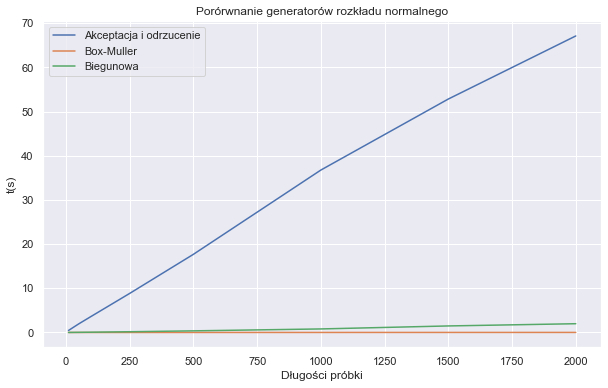

In [68]:
sample = [10, 50, 100, 250, 500, 1000, 1500, 2000]

# Pomiar czasu dla różnych długości próbek
times_norm_akc_odrz = [time_norm_akc_odrz(n) for n in sample]
times_box_muller = [time_box_muller(n) for n in sample]
times_biegunowa = [time_biegunowa(n) for n in sample]

# Wykres czasów dla obu metod
plt.figure(figsize=(10,6))
plt.plot(sample, times_norm_akc_odrz, label='Akceptacja i odrzucenie')
plt.plot(sample, times_box_muller, label='Box-Muller')
plt.plot(sample, times_biegunowa, label='Biegunowa')
plt.xlabel('Długości próbki')
plt.ylabel('t(s)')
plt.title('Porórwnanie generatorów rozkładu normalnego')
plt.legend()
plt.show()


Widzimy po uzyskanych czasach dla dużej próbki $n_{1} = 10^{5}$ oraz po otrzymanym wykresie porównującym pomiar czasu dla próbek różnej długości, dla wcześniej zaimplementowanych metod dla rozkładu normalnego, że metoda akceptacji i odrzucenia jest zdecydowanie najwolniejsza. Widzimi również, że metoda Box - Mullera jest trochę szybsza, co w rzeczywistości nie jest prawdą, ponieważ metoda biegunowa jest najszybsza z tych trzech metod. Rozbieżności w rzeczywistych wynikach są spowodowane wybranym przez nas językiem programowania. 

***

### **4. Algorytm Ziggurat**

Algorytm polega na pokryciu obszaru pod krzywą 256 prostokątami w taki sposób, aby różnica między sumą pól prostokątów i wartością pola pod krzywą była jak najmniejsza. Krzywa w tym przypadku to $f(x)$, a $k$ i $w$ to wektory.

$ x_i $ to prawe krawędzie prostokątów
$$ x_i(f(x_{i-1}) - f(x_i)) = v $$
dla $ i = 1,2,...,255 $, a $ v $
$$ v = rf(r) + \int_r^\infty f(x) dx $$
Wybieramy r takie aby spełniona była nierówność $ | v - x_1 + x_1f(x_1) | < \epsilon $, gdzie $ \epsilon $ to pewna mała wartość i żeby zachodziło
$$ x_i = f^{-1}(\frac{v}{x_{i+1}} + f(x_{i+1}))$$
dla $ i = 254,...,1.
Szacujemy r przy pomocy metody bisekcji, która polegana iteracyjnym dzieleniu przedziału na pół, a następnie wyborze połowy, która zawiera pierwiastek.


Generowanie wektorów $ k $ i $ w $
<br>
Niech $ k_0 = \lfloor 2^{32}r(\frac{f(r)}{v}) \rfloor $ i $ w_0 = 0.5^{32} \frac{v}{f(r)}$ . Dla każdego $ i = 1,...,255 $ podstawiamy $$ k_i = \lfloor 2^{32}(\frac{x_{i-1}}{x_i}) \rfloor $$ $$ w_i = 0.5^{32}x_i$$

**Główny algorytm:**
1. Wygneruj 32 bitową liczbę całkowitą $ j $ i niech $i$ będzie liczbą całkowitą utworzoną z 8 ostatnich bitów $ j $
2. Ustaw $ x = jw_i$. Jeżeli $ j< k_u $ to zwróć $x$.
3. Jeżeli $i = 0$ wygeneruj realizację $x$ z ogona rozkładu.
4. Jeżeli $(f(x_{i-1} - f(x_i)))U < f(x) - f(x_i) $, zwróć $x$.Tutaj $ U \sim \mathcal{U}(0,1) $.
5. Wróć do punktu 1.

#### 4.1 Algorytm Ziggurat dla rozkładu normalnego

In [204]:
r = 3.6541528853610088
v = 0.00492867323399
f = lambda x : np.exp((-x*x)/2)
n = 100000
result = []

In [205]:
xl = np.zeros(256)
xl[-1] = r
for i in range(254,0,-1):
    xl[i] = np.sqrt(-2*np.log((v/xl[i+1] + f(xl[i+1]))))
    xl[0] = 0

k0 = np.floor(2**32*r*(f(r)/v))
w0 = ((1/2)**32)*(v/f(r))
k = np.zeros(256)
w = np.zeros(256)
k[0] = k0
w[0] = w0

for i in range(1,255):
    k[i] = np.floor(2**32 * (xl[i-1]/xl[i]))
    w[i] = ((1/2)**32)*xl[i]


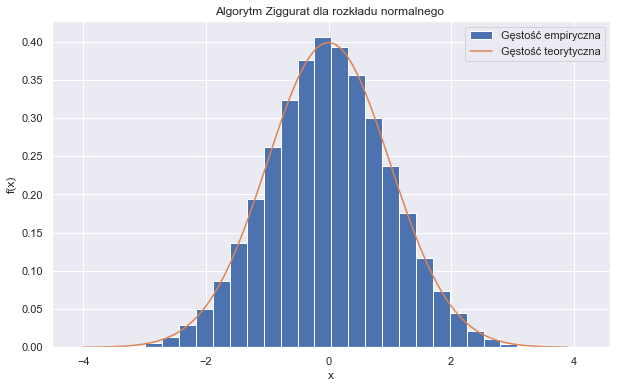

In [206]:
for i in range(n):
    j = random.getrandbits(32)
    i = int(bin(j)[-8:], base = 2)
    x = j*w[i]
    if j < k[i]:
        result.append(x)
        continue
    if i == 0 :
        u1 = np.random.uniform()
        u2 = np.random.uniform()
        x1 = -np.log(u1)/r 
        y1 = -np.log(u2)
        while 2*y1 < x1*x1:
            u1 = np.random.uniform()
            u2 = np.random.uniform()
            x1 = -np.log(u1)/r 
            y1 = -np.log(u2)
        result.append(x1 + r)
        continue
    if (f(xl[i-1]) - f(xl[i]))*np.random.uniform() < (f(x) - f(xl[i])):
        result.append(x)
        continue

for i in range(len(result)):
    u = np.random.uniform()
    if u < 0.5:
        result[i] = -result[i]
    else:
        continue


plt.figure(figsize=(10,6))
plt.hist(result, bins = 30, density = True, label = 'Gęstość empiryczna')

x = np.arange(-4,4,0.1)
plt.plot(x, norm.pdf(x), label = 'Gęstość teorytyczna')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title("Algorytm Ziggurat dla rozkładu normalnego ")
plt.legend()

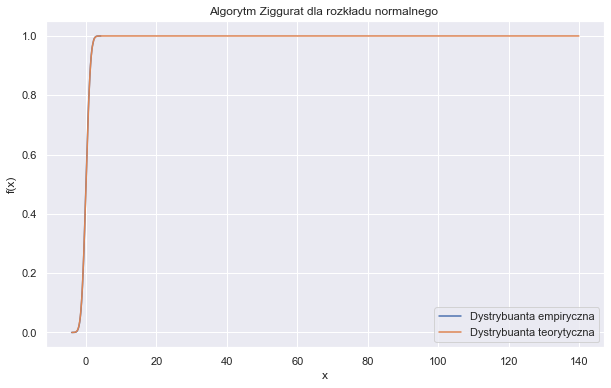

In [207]:
ecdf = ECDF(result)
plt.figure(figsize=(10,6))

plt.plot(ecdf.x, ecdf.y, label = 'Dystrybuanta empiryczna')

x = np.arange(-4,140,0.1)
plt.plot(x, norm.cdf(x), label = 'Dystrybuanta teorytyczna')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title("Algorytm Ziggurat dla rozkładu normalnego ")
plt.legend()

Algorytm poprawnie generuje próbkę z rozkładu normalnego.

#### 4.2 Algorytm Ziggurat dla rozkładu Pareto

Dystrybuanta rozkładu Pareto
$$ F(x) =  1 - \left( \frac{x_m}{x} \right) ^ \alpha $$
Gęstość
$$ f(x) = \frac{\alpha x_m^\alpha}{x^{\alpha+1}} $$
$x_m $ to punkt początkowy, przyjmujemy tutaj $ x_m = 1 $, a $\alpha$ to parametr kształtu.

Próbkę z rozkładu Perto generujemy za pomocą metody odwrotnej dystrybuanty.
$$ F^{-1}(x) = \frac{x_m}{(1-x)^{\frac{1}{\alpha}}}

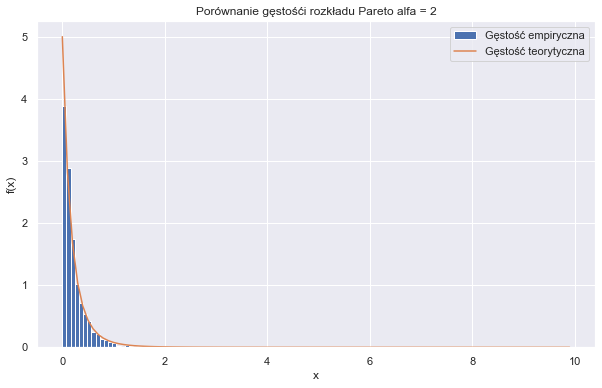

In [208]:
xm = 1
def inverse_pareto_dist(alfa,n,xm, r=0):
    list_x = []
    for i in range(0,n):
        u = np.random.uniform(1-(xm/(r + xm))**alfa, 1)
        list_x.append(xm/(((1-u)**(1/alfa))) - xm)
    return list_x

pareto1 = inverse_pareto_dist(5,1000,xm)
plt.figure(figsize=(10,6))
plt.hist(pareto1, density = True, bins = 50, label = 'Gęstość empiryczna')
x = np.arange(0,10,0.1)
plt.plot(x, pareto.pdf(x, b = 5, loc = -1), label = 'Gęstość teorytyczna')
plt.title('Porównanie gęstośći rozkładu Pareto alfa = 2')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()

Szacowanie $ r $ i $v$ oraz generowanie  $x_i$

In [209]:
alfa = 2.5
xm = 1.0
eps = 1e-7

f = lambda x :  alfa/((x+xm)**(alfa+1))

def x_list(r):
    v = r * f(r) + (xm/(r+xm))**alfa
    xl = np.zeros(256)
    xl[-1] = r
    for i in range(254,-1,-1):
        xl[i] = (alfa/(v/xl[i+1] + f(xl[i+1])))**(1/(alfa+1)) - xm

    return xl

def find_r_x(a,b):
    while True:
        m = (a + b)/2
        z_a = x_list(a)[0]
        z_m = x_list(m)[0]
        
        if  z_a * x_list(b)[0] < 0:
            if z_m == 0:
                r = m
            if z_m * z_a < 0:
                b = m
            else:
                a = m
            r = (a + b)/2
        if (b - a) / 2 < eps:
            return False
        
        r = (a + b)/2
        v = r * f(r) + (xm/(r+xm))**alfa
        if abs(x_list(r)[0]) < 1e-4:
            return r, v
        
r,v = find_r_x(13.77,14)
xl = x_list(r)

In [210]:
r,v

(13.7852734375, 0.003962687873497602)

Generowanie wektorów $ k $ i $ w$

In [211]:
k0 = np.floor(2**32*r*(f(r)/v))
w0 = ((1/2)**32)*(v/f(r))
k = np.zeros(256)
w = np.zeros(256)
k[0] = k0
w[0] = w0

for i in range(1,255):
    k[i] = np.floor(2**32 * (xl[i-1]/xl[i]))
    w[i] = ((1/2)**32)*xl[i]

Implementacja algorytmu

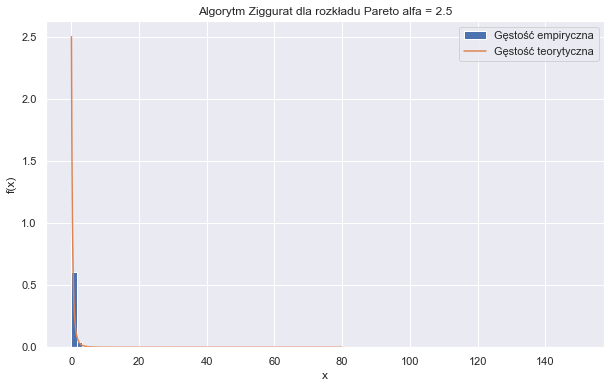

In [212]:
n = 100000
result = []

for _ in range(n):
    j = random.getrandbits(32)
    i = int(bin(j)[-8:], base = 2)
    x = j*w[i]
    if j < k[i]:
        result.append(x)
        continue
    if i == 0:
        x1 = np.array(inverse_pareto_dist(alfa,1,xm,r))
        result.append(x1[0])
        continue
    if (f(xl[i-1]) - f(xl[i]))*np.random.uniform() < (f(x) - f(xl[i])):
        result.append(x)
        continue

plt.figure(figsize=(10,6))
plt.hist(result, bins = 100, density = True, label = 'Gęstość empiryczna')

x = np.arange(0, 80, 0.01)
plt.plot(x,pareto.pdf(x+1,alfa), label = 'Gęstość teorytyczna')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Algorytm Ziggurat dla rozkładu Pareto alfa = 2.5')
plt.legend()

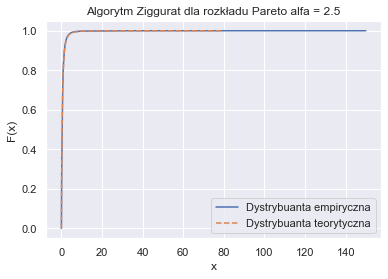

In [213]:
ecdf = ECDF(result)
plt.plot(ecdf.x, ecdf.y, label = 'Dystrybuanta empiryczna')
x = np.arange(0,80,0.1)
y = pareto.cdf(x+1, b = alfa)
plt.plot(x, y, label = 'Dystrybuanta teorytyczna', linestyle = 'dashed')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.title('Algorytm Ziggurat dla rozkładu Pareto alfa = 2.5')
plt.legend()


##### Średnia i wariancja

In [214]:
mean1 = sum(result)/len(result)
print('Średnia empiryczna:', mean1)

mean_t = alfa*xm/(alfa-1)
print('Średnia teorytyczna:', mean_t/alfa)

Średnia empiryczna: 0.6441574130951901
Średnia teorytyczna: 0.6666666666666667


In [215]:
result2 = [i**2 for i in result]
var1 = sum(result2)/len(result2) - mean1**2
print('Wariancja empiryczna:', var1)

var_t = xm**2 * alfa/ ((alfa-1)**2 * (alfa-2))
print('Wariancja teorytyczna:', var_t)

Wariancja empiryczna: 1.7829548179377581
Wariancja teorytyczna: 2.2222222222222223


Algorytm Zigguart poprawnie generuje próbkę z rozkładu Pareto dla $ \alpha = 2 $. Wykresy gęstości i dystrybunaty pokrywają się z teorytyczną gęstością i dystrybuantą. Średnia jest zbliżona do teorytycznej, a wariancja będzie się zbliżać do wartości teorytycznej przy zwiększaniu długości próbki.

***

### 5. Podsumowanie
Udało nam się zaimplementować metody: metoda odwracania dystrybuanty, metoda akceptacji-odrzucenia, metody generowania rozkładu normalnego (metoda Boxa-Mullera, metoda biegunowa, metoda akceptacji-odrzucenia przy użyciu rozkładu wykładniczego) oraz algorytm Ziggurat. Przetestowałyśmy generatory dla rozkładów ciągłych oraz dyskretnych. Sprawdziłyśmy czy średnie i wariancje są podobne do teorytycznych wartości, dla rozkładu normalnego także skośność i kurtozę. W przypadku rozkładu normalnego porównałyśmy czas metody ze względu na czas działania w zależności od długośći próbki. Wygenerowałyśmy wykresy rozkładów, gęstości oraz dystrybuanty, wykresy kwantylowe - porównałyśmy z teorytycznymi wartościami. Algorytm Ziggurat zaimplementowałyśmy dla rozkładu normalnego oraz rozkładu Pareto.

### Literatura
<a id="bibliografia"></a>
[1] Karl Sigman *Acceptance-Rejection Method*, Uniwersytet Columbia, 2007
